In [1]:
import numpy as np 

In [7]:
from utilities import dump_pickle
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [13]:

def removeDuplicates(arr): 
    res = []
    res_set = set()
    for a in arr: 
        if a not in res_set:
            res_set.add(a)
            res.append(a)
    return res

In [14]:
def plot_graph(mircowire_loss, region_loss, reg_single, reg, save_dir):
    label = np.zeros(len(reg_single))
    sum_mircowire = region_loss * 0

    for k in range(len(reg_single)):
        loc = np.where(reg==reg_single[k])[0]
        print(loc, reg, reg_single[k])
        label[k] = int((loc.max() + loc.min())/2)
        if len(loc) == 1:
            sum_mircowire[:,loc] = mircowire_loss[:,loc]    
            continue
        sum_mircowire[:,loc] = np.tile(np.expand_dims(np.sum(mircowire_loss[:,loc], axis = 1), axis = 1), (1, len(loc)))
    plt.close("all")
    fig, axes = plt.subplots(mircowire_loss.shape[0],1, sharey=True ,figsize=(12,12)) 
    for character_number in range(mircowire_loss.shape[0]):
        axes[character_number].plot(mircowire_loss[character_number,:], 'bo-', label="mircowire loss")
        axes[character_number].plot(region_loss[character_number,:], 'r*-',label="region loss")
        axes[character_number].plot(sum_mircowire[character_number,:], 'gd-',label="sum mircowire loss")
        axes[character_number].set_xticks(label, minor=False)
        axes[character_number].set_xticklabels(reg_single, minor=False)
        axes[character_number].set_title("person index: " + str(character_number) +  " importance plot")
        axes[character_number].legend()
    plt.savefig(os.path.join(save_dir, "important_region_new.jpg"))
   

OF'
 'LOF' 'LPSMA' 'LPSMA' 'LPSMA' 'LPSMA' 'RAC' 'RAC' 'RAC' 'RAC' 'RAC' 'RAC'
 'RAC' 'RACV' 'RACV' 'RACV' 'RACV' 'RACV' 'RACV' 'RACV' 'RACV' 'LACV'
 'LACV' 'RMC' 'RMC' 'RMC' 'RMC' 'RMC' 'RMC'] RPSMA
[7 8 9] ['REC' 'REC' 'REC' 'REC' 'RPSMA' 'RPSMA' 'RPSMA' 'RPH' 'RPH' 'RPH' 'LPH'
 'LPH' 'LPH' 'LPH' 'LPH' 'LPH' 'LPH' 'LEC' 'LEC' 'LEC' 'LEC' 'LEC' 'LOF'
 'LOF' 'LPSMA' 'LPSMA' 'LPSMA' 'LPSMA' 'RAC' 'RAC' 'RAC' 'RAC' 'RAC' 'RAC'
 'RAC' 'RACV' 'RACV' 'RACV' 'RACV' 'RACV' 'RACV' 'RACV' 'RACV' 'LACV'
 'LACV' 'RMC' 'RMC' 'RMC' 'RMC' 'RMC' 'RMC'] RPH
[10 11 12 13 14 15 16] ['REC' 'REC' 'REC' 'REC' 'RPSMA' 'RPSMA' 'RPSMA' 'RPH' 'RPH' 'RPH' 'LPH'
 'LPH' 'LPH' 'LPH' 'LPH' 'LPH' 'LPH' 'LEC' 'LEC' 'LEC' 'LEC' 'LEC' 'LOF'
 'LOF' 'LPSMA' 'LPSMA' 'LPSMA' 'LPSMA' 'RAC' 'RAC' 'RAC' 'RAC' 'RAC' 'RAC'
 'RAC' 'RACV' 'RACV' 'RACV' 'RACV' 'RACV' 'RACV' 'RACV' 'RACV' 'LACV'
 'LACV' 'RMC' 'RMC' 'RMC' 'RMC' 'RMC' 'RMC'] LPH
[17 18 19 20 21] ['REC' 'REC' 'REC' 'REC' 'RPSMA' 'RPSMA' 'RPSMA' 'RPH' 'RPH' 'RPH' 'LPH'

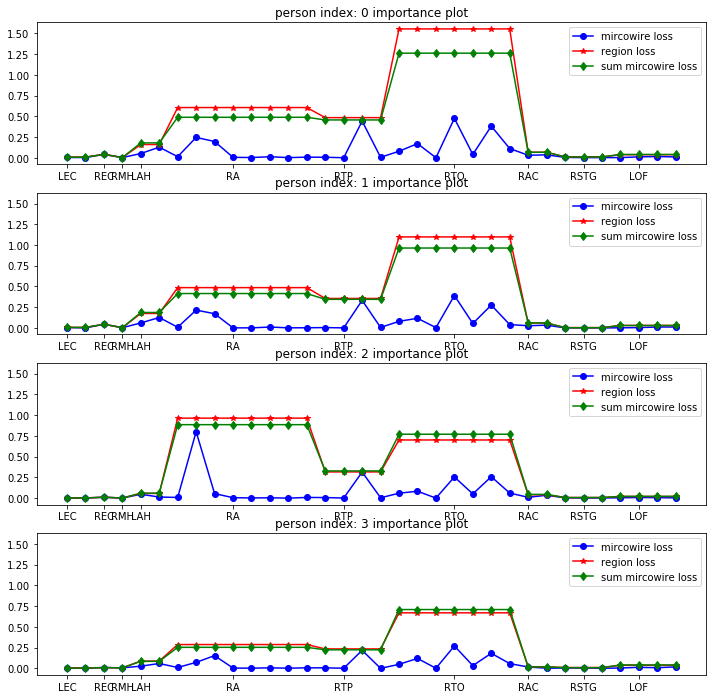

In [15]:
import os
patientNums = ['431', '433', '435', '436', '439', '441', '442', '444', '445', '452']
#kfold_folder = "/media/yipeng/toshiba/movie/Movie_Analysis/CNN_result_zero/CNN_multi_2_KLD"
kfold_folder = "/media/yipeng/toshiba/movie/Movie_Analysis/CNN_result/LSTM_multi_2_KLD"
#one_fold_folder = "/media/yipeng/toshiba/movie/Movie_Analysis/knockout_test_CNN_KLD"
one_fold_folder = "/media/yipeng/toshiba/movie/Movie_Analysis/knockout_test_LSTM_KLD"
path_to_matlab_generated_movie_data = "/media/yipeng/toshiba/movie/Movie_Analysis/data/"

for p in patientNums:
    kfold_stats = {}
    for k in range(5):
        one_patient_stats_fn = os.path.join(one_fold_folder, p, str(k),"knock_out_stats.pkl")
        one_patient_stats = np.load(one_patient_stats_fn, allow_pickle=True)
        for key in one_patient_stats.keys():
            if key == "reg":
                continue
            if key in kfold_stats:
                kfold_stats[key] += one_patient_stats[key]
            else:
                kfold_stats[key] = one_patient_stats[key]
    for key in kfold_stats.keys():
        kfold_stats[key] = kfold_stats[key]/5
    kfold_stats["reg"] = one_patient_stats["reg"]
    microarr_fn = os.path.join(path_to_matlab_generated_movie_data, p,"channel_data.mat")
    microarr_temp = loadmat(microarr_fn)["channel_reg_info"][0]
    kfold_stats["neuron/mirco_wire"] = refactor_array(microarr_temp)
    plot_graph(kfold_stats["mircowire_loss"], kfold_stats["region_loss"], removeDuplicates(kfold_stats["reg"]), kfold_stats["reg"], os.path.join(kfold_folder, p))
    dump_pickle(os.path.join(kfold_folder, p, "knock_out_stats_new.pkl"), kfold_stats)


In [7]:
from scipy.io import loadmat
path_to_matlab_generated_movie_data = "/media/yipeng/toshiba/movie/Movie_Analysis/data/"
microarr_fn = os.path.join(path_to_matlab_generated_movie_data,"431","channel_data.mat")
microarr_temp = loadmat(microarr_fn)["channel_reg_info"][0]

In [11]:
def refactor_array(microarr_temp):
    res = {}
    for m in microarr_temp:
        neural_number = m[0][0][0]
        if neural_number in res:
            res[neural_number] += 1
        else:
            res[neural_number] = 1
    return res

In [16]:
len(refactor_array(microarr_temp))

52

In [ ]:
"/media/yipeng/toshiba/movie/Movie_Analysis/CNN_result_zero/CNN_multi_2_KLD/431/knock_out_stats_new.pkl"

In [21]:
reg1 = np.load("/media/yipeng/toshiba/movie/Movie_Analysis/CNN_result_zero/CNN_multi_2_KLD/431/knock_out_stats_new.pkl", allow_pickle=True)

In [19]:
len(['RA', 'RA', 'RA', 'RA', 'RA', 'RA', 'RMH', 'RMH', 'RMH', 'RSTA',
        'RSTA', 'RSTA', 'RSTA', 'RSTA', 'RSTA', 'RSTA', 'RSTA', 'RSTP',
        'RSTP', 'RSTP', 'RSTP', 'RSTP', 'RSTP', 'LST', 'LST', 'LST', 'LST',
        'LIP', 'LIP', 'LIP', 'LIP', 'LIP', 'LIP', 'LIP', 'RSS', 'RSS',
        'RSS', 'RSS', 'RSS', 'RSS', 'RIPA', 'RIPA', 'RIPA', 'RIPA', 'RIPP',
        'RIPP', 'RIPP', 'RIPP', 'RIPP', 'RIPP', 'RIPP', 'RIPP'])

52

In [1]:
from utilities import load_pickle

/media/yipeng/toshiba/movie/Movie_Analysis/Character_TimeStamp_resnet/1.pkl
/media/yipeng/toshiba/movie/Movie_Analysis/Character_TimeStamp_resnet/0.pkl
/media/yipeng/toshiba/movie/Movie_Analysis/Character_TimeStamp_resnet/2.pkl
/media/yipeng/toshiba/movie/Movie_Analysis/Character_TimeStamp_resnet/3.pkl


In [2]:
aa =load_pickle("/media/yipeng/toshiba/movie/Movie_Analysis/CNN_result_zero/CNN_multi_2_KLD/431/mentest_cond_prob_response.pkl")

/media/yipeng/toshiba/movie/Movie_Analysis/CNN_result_zero/CNN_multi_2_KLD/431/mentest_cond_prob_response.pkl


In [10]:
aa['overall_stats']['0#0#1'] # character#condi_chara#episode 

array([0.99876958, 0.9968906 , 0.99999714, 0.99855763, 0.99980021,
       0.982903  , 0.95034701, 0.78579354, 0.99503702, 0.63487667,
       0.63559413, 0.98195392, 0.70543671, 0.99103206, 0.99999142,
       0.900545  , 0.98039663, 0.99256527, 0.99999332, 0.99955618,
       0.99995708, 0.93367612, 0.62902939, 0.9752512 , 0.67946386,
       0.99712449, 0.62804818, 0.55677998, 0.92132533, 0.69957143,
       0.98918414, 0.97402847, 0.82487768, 0.93475258, 0.99708223,
       0.58520317, 0.99336261, 0.69756144, 0.98185045, 0.84631842,
       0.99933791, 0.99972397, 0.82843459, 0.97554332, 0.71223414,
       0.9369117 , 0.99101979, 0.99956572, 0.73576695, 0.99055159,
       0.60316759, 0.90696687, 0.98274559, 0.99982071, 0.97357762,
       0.99122512, 0.96961737, 0.99680889, 0.55934244, 0.81023353,
       0.92970127, 0.88133538, 0.99898773, 0.99833816, 0.99998283,
       0.51953161, 0.98261672, 0.80943203, 0.99572003, 0.99807495,
       0.99613464, 0.66188955, 0.99999714, 0.99802548, 0.99984

In [11]:
aa['overall_stats'].keys()

dict_keys(['0#0#1', '0#0#2', '1#0#1', '1#0#2', '2#0#1', '2#0#2', '3#0#1', '3#0#2', '0#1#1', '0#1#2', '1#1#1', '1#1#2', '2#1#1', '2#1#2', '3#1#1', '3#1#2', '0#2#1', '0#2#2', '1#2#1', '1#2#2', '2#2#1', '2#2#2', '3#2#1', '3#2#2', '0#3#1', '0#3#2', '1#3#1', '1#3#2', '2#3#1', '2#3#2', '3#3#1', '3#3#2'])

In [14]:
aa['patient_acc_stats']

array([[1.  , 0.42, 0.09, 0.17, 0.34, 1.  , 0.11, 0.17, 0.48, 0.74, 1.  ,
        0.39, 0.35, 0.43, 0.15, 1.  ],
       [1.  , 0.38, 0.04, 0.19, 0.39, 1.  , 0.06, 0.15, 0.29, 0.38, 1.  ,
        0.24, 0.5 , 0.39, 0.09, 1.  ]])

In [ ]:
sum(aa['overall_stats']['0#0#1'] > 0.5)/ len()

In [28]:
aa = load_pickle("/media/yipeng/toshiba/movie/Movie_Analysis/CNN_result_zero/CNN_multi_2_KLD/431/episode_each_clip.pkl")

/media/yipeng/toshiba/movie/Movie_Analysis/CNN_result_zero/CNN_multi_2_KLD/431/episode_each_clip.pkl


In [30]:
aa

array([1., 1., 2., 2., 1., 1., 2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 2., 2., 2., 1., 1., 1., 2., 2., 2., 2., 2.,
       1., 1., 1., 2., 1., 1., 2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1., 2., 2., 2.,
       1., 2., 1., 2., 2., 2., 2., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 1., 2., 2., 2., 1.,
       1., 2., 2., 2., 1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1.,
       2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2.,
       1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 2., 1., 1.])

In [ ]:
aa = load_pickle("/media/yipeng/toshiba/movie/Movie_Analysis/CNN_result_zero/CNN_multi_2_KLD/431/episode_each_clip.pkl")

In [23]:
aa.shape

150

In [22]:
aa[1]["start"][0].shape

(4, 14)

In [24]:
aa[1]["end"][0].shape

(4, 14)

In [1]:
raw = {'0|0': 1.0,
'0|1': 0.672,
'0|2': 0.0,
'0|3': 0.776,
'1|0': 0.   ,
'1|1': 1.0,
'1|2': 0.187,
'1|3': 0.257,
'2|0': 0.0,
'2|1': 0.133,
'2|2': 1.0,
'2|3': 0.035,
'3|0': 0.507,
'3|1': 0.202,
'3|2': 0.039,
'3|3': 1.0}
one_step_res = {'0|0': 1.0, '0|1': 0.8282041362361431, '0|2': 0.15553410733277281, '0|3': 0.9482255104964116, '1|0': 0.6870705166249167, '1|1': 1.0, '1|2': 0.1969343082497601, '1|3': 0.6953589380435576, '2|0': 0.09176604242284847, '2|1': 0.14005990447377425, '2|2': 1.0, '2|3': 0.06897894228908416, '3|0': 0.6189591399214647, '3|1': 0.5471362243336229, '3|2': 0.07631510647995454, '3|3': 1.0}

In [2]:
two_step = one_step(one_step_res)

NameError: name 'one_step' is not defined

In [1]:
from utilities import load_pickle
def parse_key(char, cond_char):
    return str(char) + "|"+ str(cond_char)
def one_step(prob):
    res = {}
    for char in range(4):
        for cond_char in range(4):
            ori_key = parse_key(char, cond_char)
            if char == cond_char:
                res[ori_key] = prob[ori_key]  
                continue  
            #print("we car calcuating, ", parse_key(char,cond_char))
            walk_prob = 0.0
            for walk_char in range(4):      
                if walk_char == char:
                    continue
                walk_cond = parse_key(walk_char,cond_char)
                char_walk = parse_key(char, walk_char)
                #print(char_walk,prob[char_walk], walk_cond,prob[walk_cond])
                walk_prob = walk_prob + 1.0*prob[walk_cond] * prob[char_walk]
                #print(walk_prob)
            final_key = parse_key(char,cond_char)
            res[final_key] = walk_prob 
    return res
def one_step_with_prob(prob,p):
    res = {}
    for char in range(4):
        for cond_char in range(4):
            ori_key = parse_key(char, cond_char)
            if char == cond_char:
                res[ori_key] = prob[ori_key]  
                continue  
            #print("we car calcuating, ", parse_key(char,cond_char))
            walk_prob = 0.0
            for walk_char in range(4):      
                if walk_char == char or walk_char == cond_char:
                    continue
                walk_cond = parse_key(walk_char,cond_char)
                char_walk = parse_key(char, walk_char)
                #print(char_walk,prob[char_walk], walk_cond,prob[walk_cond])
                walk_prob = walk_prob + 1.0*prob[walk_cond] * prob[char_walk] * p[walk_char]
                #print(walk_prob)
            final_key = parse_key(char,cond_char)
            res[final_key] = walk_prob + prob[ori_key]
    print(res)

/media/yipeng/data/movie/Movie_Analysis/Character_TimeStamp_resnet/1.pkl
/media/yipeng/data/movie/Movie_Analysis/Character_TimeStamp_resnet/0.pkl
/media/yipeng/data/movie/Movie_Analysis/Character_TimeStamp_resnet/2.pkl
/media/yipeng/data/movie/Movie_Analysis/Character_TimeStamp_resnet/3.pkl


In [42]:
p = {0:0, 1:0.8, 2:0.1,3:0.1}
### 431:: [6.10500611e-01 3.24553459e-01 1.11022302e-16 1.35435247e+00]
### 435:: -0.64588817  0.94782474 47.82276547  2.5174464 
### 436:: [-0.18261339  0.46379941 24.14056532  0.85943173]
### 442:: [-0.46593678  1.64420732 74.56073338  2.69539177]
p = {0:0,  1: 1 , 2:1 ,3: 1}
one_step_with_prob(raw, p)

{'0|0': 1.0, '0|1': 0.80671764254096, '0|2': 0.08429273093496, '0|3': 0.85610001330464, '1|0': 0.11198309498727, '1|1': 1.0, '1|2': 0.19561408422979, '1|3': 0.26354500000000003, '2|0': 0.01525061604885, '2|1': 0.1390761823311, '2|2': 1.0, '2|3': 0.05085312763321001, '3|0': 0.507, '3|1': 0.207187, '3|2': 0.05651955891334, '3|3': 1.0}


In [43]:
 np.mean(aa['patient_acc_stats'], axis=0)

array([1.   , 0.24 , 0.095, 0.41 , 0.245, 1.   , 0.16 , 0.415, 0.165,
       0.265, 1.   , 0.335, 0.275, 0.265, 0.13 , 1.   ])

In [19]:
print(raw)

{'0|0': 1.0, '0|1': 0.672, '0|2': 0.0, '0|3': 0.776, '1|0': 0.0, '1|1': 1.0, '1|2': 0.187, '1|3': 0.257, '2|0': 0.0, '2|1': 0.133, '2|2': 1.0, '2|3': 0.035, '3|0': 0.507, '3|1': 0.202, '3|2': 0.039, '3|3': 1.0}


aa['patient_acc_stats']

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = False)  
y_train = np.mean(aa['patient_acc_stats'], axis=0) - np.array(list(raw.values()))
y_train[y_train<0] = 0
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [48]:

print(regressor.coef_)
print(regressor.intercept_)

[-0.46593678  1.64420732 74.56073338  2.69539177]
0.0


In [40]:
np.array(list(raw.values()))

array([1.   , 0.672, 0.   , 0.776, 0.   , 1.   , 0.187, 0.257, 0.   ,
       0.133, 1.   , 0.035, 0.507, 0.202, 0.039, 1.   ])

In [41]:
import numpy as np
import copy
X_train = np.zeros((16,4))
cnt = -1
prob = copy.deepcopy(raw)
for char in range(4):
    for cond_char in range(4):
        cnt+=1
        ori_key = parse_key(char, cond_char)
        if char == cond_char:
            #res[ori_key] = prob[ori_key]  
            continue  
        #print("we car calcuating, ", parse_key(char,cond_char))
        walk_prob = 0.0
        info_index = 0
        for walk_char in range(4):      
            if walk_char == char or walk_char == cond_char:
                X_train[cnt, walk_char] = 0
                continue
            walk_cond = parse_key(walk_char,cond_char)
            char_walk = parse_key(char, walk_char)
            X_train[cnt, walk_char] = prob[walk_cond] * prob[char_walk]
            #print(walk_prob)

In [44]:
aa = load_pickle("/media/yipeng/toshiba/movie/Movie_Analysis/CNN_result_zero/CNN_multi_2_KLD/442/mentest_cond_prob_response.pkl")

/media/yipeng/toshiba/movie/Movie_Analysis/CNN_result_zero/CNN_multi_2_KLD/442/mentest_cond_prob_response.pkl


In [35]:
aa['patient_acc_stats']

array([[1.  , 0.26, 0.09, 0.45, 0.24, 1.  , 0.16, 0.38, 0.16, 0.3 , 1.  ,
        0.33, 0.29, 0.25, 0.11, 1.  ],
       [1.  , 0.22, 0.1 , 0.37, 0.25, 1.  , 0.16, 0.45, 0.17, 0.23, 1.  ,
        0.34, 0.26, 0.28, 0.15, 1.  ]])

In [4]:
aa = load_pickle("/media/yipeng/data/movie/Movie_Analysis/Character_TimeStamp_annotation/0.pkl")

/media/yipeng/data/movie/Movie_Analysis/Character_TimeStamp_annotation/0.pkl


In [5]:
len(aa)

5625

In [4]:
import numpy as np 

In [1]:
import numpy as np 


In [8]:
aa = np.load("/media/yipeng/data/movie/Movie_Analysis/CNN_result/LSTM_erasing_multi_check_2/LSTM_retrain/431/LIP/0/model_results.npz", allow_pickle=True)

In [4]:
aa = load_pickle("/media/yipeng/data/movie/Movie_Analysis/CNN_result/LSTM_multi_2_KLD/431/knockout_final.pkl")

/media/yipeng/data/movie/Movie_Analysis/CNN_result/LSTM_multi_2_KLD/431/knockout_final.pkl


In [6]:
 bb = load_pickle("/media/yipeng/data/movie/Movie_Analysis/important_retrain/LSTM_retrain/431/stats.pkl")

dict_keys(['region/neuron', 'region_label', 'region_f1', 'region_acc', 'region_loss', 'mircowire/region', 'mircowire_label', 'mircowire_f1', 'mircowire_loss', 'mircowire_acc', 'reg_trim', 'region_loss_exp', 'mircowire_loss_exp', 'sum_mircowire_loss_region'])

In [14]:
import numpy as np
bb = np.mean(aa["region_f1"][1:], axis=1)

array([0.37956471, 0.79182442, 0.89065505, 0.67983897, 0.95387375,
       0.9679187 , 0.51060816, 0.24210864, 0.33877271])

In [9]:
aa["region_label"]

['baseline', 'LIP', 'LST', 'RA', 'RIPA', 'RIPP', 'RMH', 'RSS', 'RSTA', 'RSTP']